In [1]:
import pandas as pd
from datetime import datetime
from pylab import rcParams
from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
from math import log,exp
import numpy as np

In [2]:
df=pd.read_csv("temperature.csv",header=None, names=["Month","Date","Year","Temp"])

In [3]:
df.head()

,Month,Date,Year,Temp
0,1,1,1995,71.8
1,1,2,1995,72.0
2,1,3,1995,70.3
3,1,4,1995,69.7
4,1,5,1995,71.3


In [4]:
y=df["Temp"].transform(lambda x: log(x))

In [5]:
df["Month"]=df["Month"].astype("str")
df["Date"]=df["Date"].astype("str")
df["Year"]=df["Year"].astype("str")

In [6]:
 df=df.apply(lambda x: datetime.strptime("{0} {1} {2} 00:00:00".format(x['Year'],x['Month'], x['Date']), "%Y %m %d %H:%M:%S"),axis=1)

In [7]:
df1 = pd.DataFrame(df)
df1.columns=["date"]
df2 = pd.DataFrame(y)
df2.columns=["temp"]
data=[df1,df2]
df=pd.concat(data,axis=1)

In [8]:
df.head()

,date,temp
0,1995-01-01,4.273884
1,1995-01-02,4.276666
2,1995-01-03,4.252772
3,1995-01-04,4.244200
4,1995-01-05,4.266896


In [9]:
df.dtypes

date    datetime64[ns]
temp           float64
dtype: object

In [10]:
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)
df.head()

,temp
datetime,
1995-01-01,4.273884
1995-01-02,4.276666
1995-01-03,4.252772
1995-01-04,4.244200
1995-01-05,4.266896


In [11]:
df.index

DatetimeIndex(['1995-01-01', '1995-01-02', '1995-01-03', '1995-01-04',
               '1995-01-05', '1995-01-06', '1995-01-07', '1995-01-08',
               '1995-01-09', '1995-01-10',
               ...
               '2019-11-09', '2019-11-10', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-16',
               '2019-11-17', '2019-11-18'],
              dtype='datetime64[ns]', name='datetime', length=9089, freq=None)

In [12]:
df.fillna(method="ffill",inplace=True)

In [13]:
df["temp"].isnull().sum()

0

In [14]:
df["temp"].dtype

dtype('float64')

In [15]:
sns.set(rc={'figure.figsize':(11, 4)})

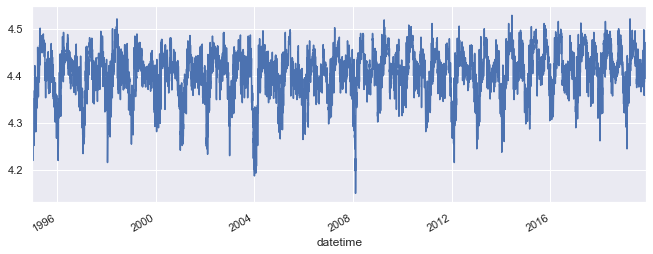

In [16]:
df['temp'].plot()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


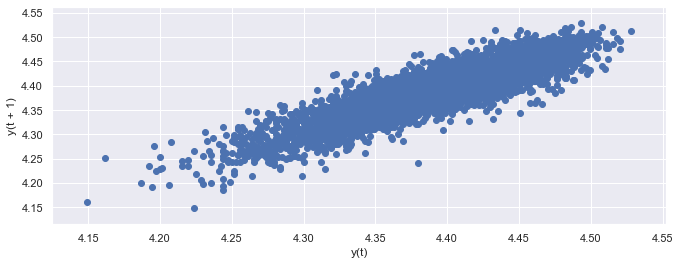

In [17]:
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

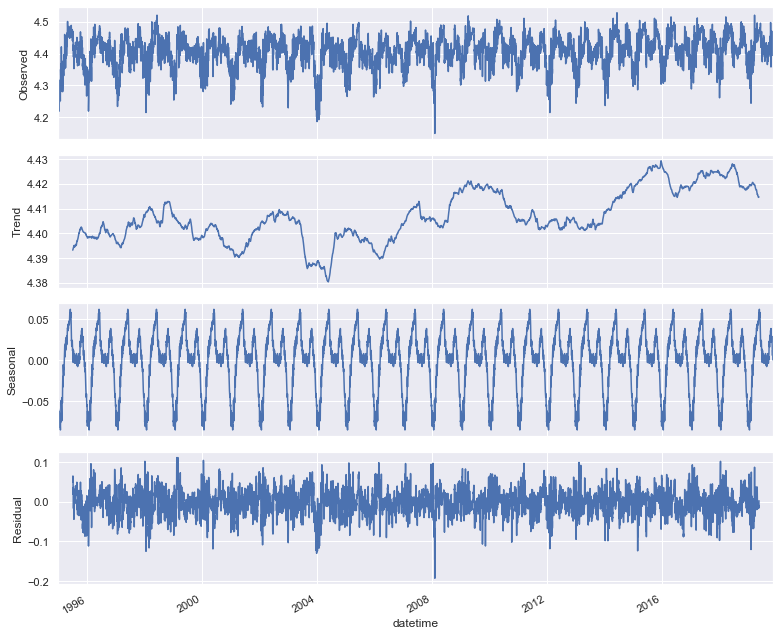

In [18]:
rcParams['figure.figsize'] = 11, 9
decomposed_plt = sm.tsa.seasonal_decompose(df["temp"],freq=365) # The frequncy is annual
figure = decomposed_plt.plot()
plt.show()

Augmented Dickey Fuller test 

In [19]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df["temp"])
print('ADF Statistic: %f' % result[0])
print('p-value:' , result[1])

ADF Statistic: -9.267914
p-value: 1.3512110933683238e-15


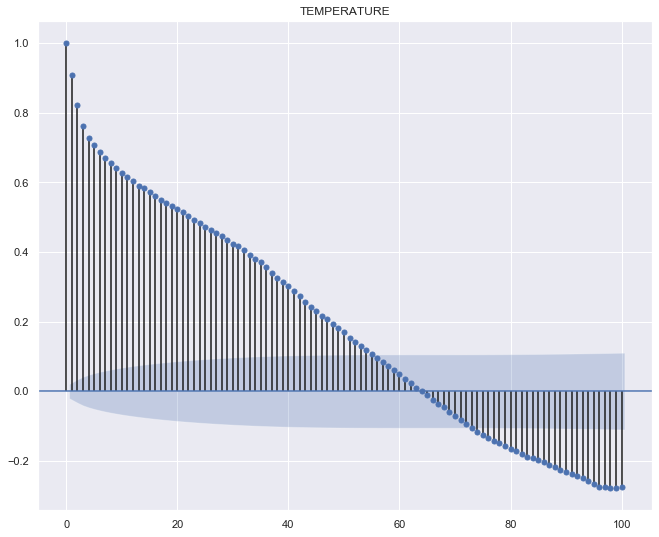

In [20]:
plot_acf(df["temp"],lags=100,title="TEMPERATURE")
plt.show()

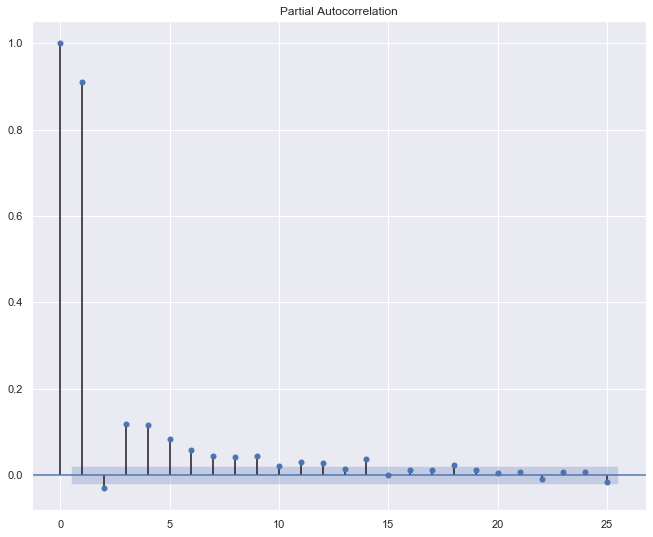

In [21]:
plot_pacf(df["temp"],lags=25)
plt.show()

In [22]:
train_size = int(len(df) * 0.7)
train, test = df[0:train_size], df[train_size:len(df)]

In [23]:
arima = sm.tsa.statespace.SARIMAX(train,order=(2,0,2),seasonal_order=(0,1,2,12),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               temp   No. Observations:                 6362
Model:             SARIMAX(2, 0, 2)x(0, 1, 2, 12)   Log Likelihood               15814.445
Date:                            Tue, 10 Dec 2019   AIC                         -31614.890
Time:                                    19:21:57   BIC                         -31567.626
Sample:                                01-01-1995   HQIC                        -31598.520
                                     - 06-01-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5382      0.027     55.972      0.000       1.484       1.592
ar.L2         -0.5467      0.026    -20.658      0.000      -0.599      -0.495
ma.L1         -0.6374      0.028    -22.831      0.000      -0.692      -0.583
ma.L2         -0.1783      0.014    -13.082      0.000      -0.205      -0.152
ma.S.L12      -0.9793      0.025    -39.007      0.000      -1.028      -0.930
ma.S.L24      -0.0211      0.012     -1.777      0.076      -0.044       0.002
sigma2         0.0004   1.01e-05     38.607      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       53.81   Jarque-Bera (JB):              1096.34
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.29
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
future_forecast = arima.predict(start="1995-01-01",end="2019-11-18")
# This returns an array of predictions:
future_forecast.head()

1995-01-01    0.000000
1995-01-02    3.287087
1995-01-03    4.801214
1995-01-04    4.711991
1995-01-05    4.401396
Freq: D, dtype: float64

In [25]:
future_forecast = pd.DataFrame(future_forecast,index = df.index,columns=["Prediction"])
t=pd.concat([df,future_forecast],axis=1)

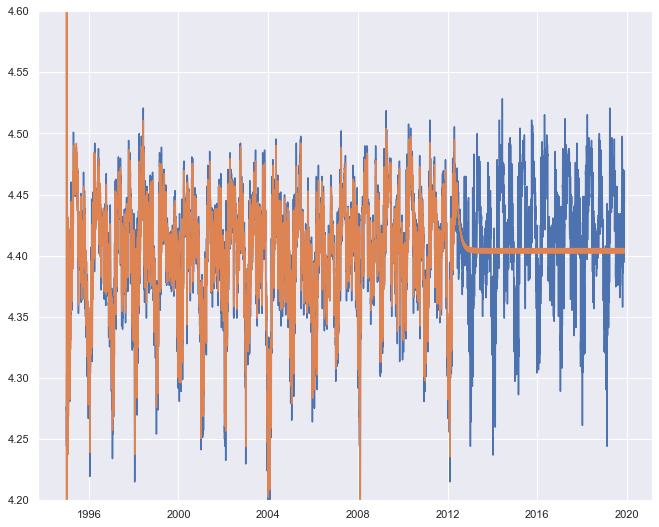

In [26]:
plt.plot(t["temp"])
plt.plot(t["Prediction"])

plt.ylim(4.2,4.6)
plt.show()


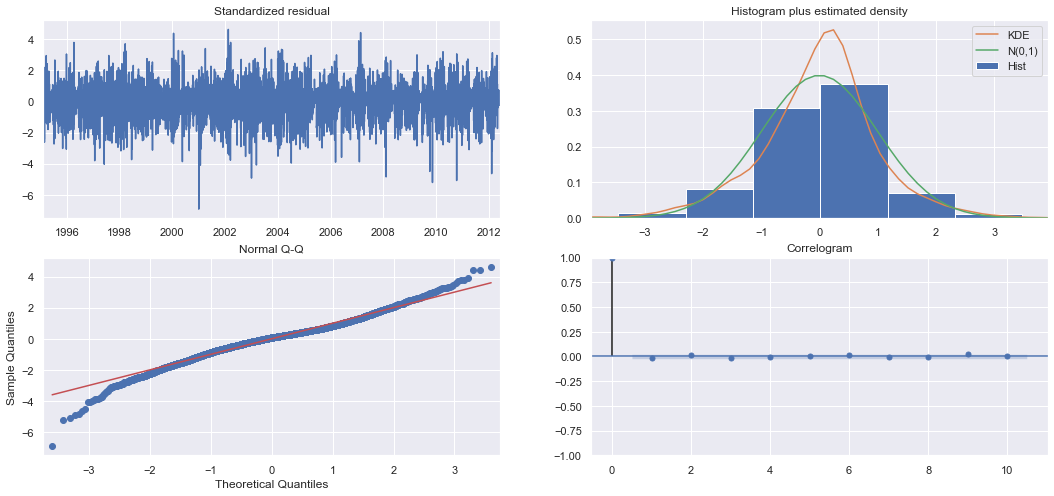

In [27]:
arima.plot_diagnostics(figsize=(18, 8))
plt.show()